# Veri Görselleştirme
* Matplotlib (low level)*
* Pandas*
* Seaborn*
* ggplot
* Bokeh
* Plot.ly


## 1. Veriye ilk bakış

In [1]:
import seaborn as sns 
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
planets.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [3]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
#ilk etapta object olarak görünen method değişkenini kategorik değişkene çevirelim
import pandas as pd 
planets.method = pd.Categorical(planets.method)
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   method          1035 non-null   category
 1   number          1035 non-null   int64   
 2   orbital_period  992 non-null    float64 
 3   mass            513 non-null    float64 
 4   distance        808 non-null    float64 
 5   year            1035 non-null   int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 41.9 KB


## 2. Veri Setinin Betimlenmesi

In [6]:
import seaborn as sns 
planets = sns.load_dataset("planets")
import pandas as pd 
planets.method = pd.Categorical(planets.method)
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   method          1035 non-null   category
 1   number          1035 non-null   int64   
 2   orbital_period  992 non-null    float64 
 3   mass            513 non-null    float64 
 4   distance        808 non-null    float64 
 5   year            1035 non-null   int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 41.9 KB


In [9]:
planets.describe().T #eksik gözlemleri göz ardı eder ve kategorik değişkenleri görmezden gelir

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


## 3. Eksik Değerlerin İncelenmesi

In [10]:
#eksik gözlem var mi?
import seaborn as sns 
planets = sns.load_dataset("planets")
import pandas as pd 
planets.isnull().values.any()

True

In [11]:
#hangi degiskenlerde kac tane var
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [15]:
#eksik verilerin duzenlenmesi icin farkli yontemler mevcut
#ancak burada en temel olarak NA degerleri 0 ile degistirebiliriz,ortalama değer konulabiliriz, eksik verilerin tamamini silebiliriz.
#ya da farklı bir çok yöntem uygulayabiliriz
#bu noktada verisetini iyi anlayip seti bozmayacak en uygun yöntem secilmelidir.
planets["orbital_period"].fillna(0, inplace = True)
planets["mass"].fillna(planets.mass.mean(), inplace = True)

In [16]:
planets.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

## 4. Kategorik Değişken Özetleri

In [18]:
import seaborn as sns 
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [21]:
katPlanets = planets.select_dtypes(include = ["object"]) #kategori donusumu yapildiysa object yerine category yazilmali

In [22]:
katPlanets.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [23]:
katPlanets.method.unique() #kategoriler neler

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [24]:
katPlanets["method"].value_counts().count() # kac kategori var

10

In [25]:
katPlanets["method"].value_counts() # kategorilerin frekanslari neler

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

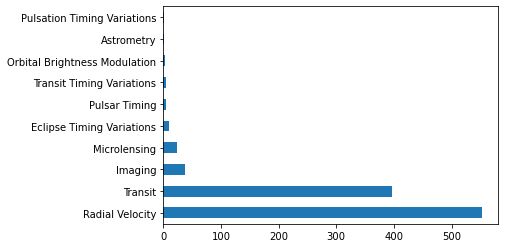

In [29]:
planets["method"].value_counts().plot.barh(); #ustte cikan minik bilgiyi kapatmak icin kullanilir

## 5. Sürekli Değişken Özetleri

In [31]:
import seaborn as sns 
planets = sns.load_dataset("planets")
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [33]:
numPlanets = planets.select_dtypes(include = ["float64", "int64"])
numPlanets.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [34]:
numPlanets.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [35]:
print("Ortalama: " + str(numPlanets["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(numPlanets["distance"].count())) 
print("Maksimum Değer: " + str(numPlanets["distance"].max()))
print("Minimum Değer: " + str(numPlanets["distance"].min()))
print("Medyan: " + str(numPlanets["distance"].median()))
print("Standart Sapma: " + str(numPlanets["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


## 6. Dağılım Grafikleri

Diamonds veriseti

**Veri Seti Hikayesi**

https://thecleverprogrammer.com/2020/08/31/diamonds-analysis-with-python/

https://medium.com/@deepak.engg.phd/pythons-seaborn-library-data-visualization-on-dataset-diamond-920c8d7b798b

https://www.kaggle.com/code/drvader/diamonds-dataset-exploration-and-regression/notebook

price price in US dollars (\$326 — \$18,823)

carat weight of the diamond (0.2–5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0–10.74)

y width in mm (0–58.9)

z depth in mm (0–31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)

table width of top of diamond relative to widest point (43–95)

In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [6]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

**Not:** Üstteki iki kategorik değişken de ordinal (değerler arasında bir farklılık vardır) değerlere sahiptir. Bu yuzden de ordinal olarak tanımlanması gerekir


In [7]:
#ordinal tanımlama 
from pandas.api.types import CategoricalDtype

In [8]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [11]:
#"cut" isimli değişkenin tipini kategorik tiplerden sıralı yani ordinal tipe dönüştür
df.cut = df.cut.astype(CategoricalDtype(ordered = True)) 

In [12]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [16]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

**Not:** üstteki sıralamayı hatalı yaptığını gözlemliyoruz. Sıralamanın bizim tarafımızdan düzenlenmesi gerekiyor.

In [17]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [18]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [19]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

### 6.1. Barplot (Sütun Grafik)

Eldeki kategorik değişkenleri görselleştirmek için kullanılır.

Text(0.5, 1.0, 'Cut Değişkeninin Sınıf Frekansları')

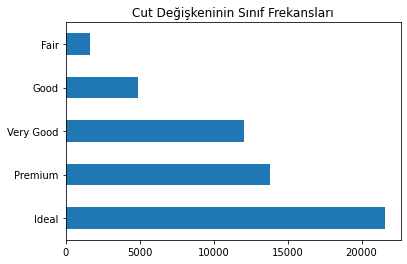

In [21]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları")

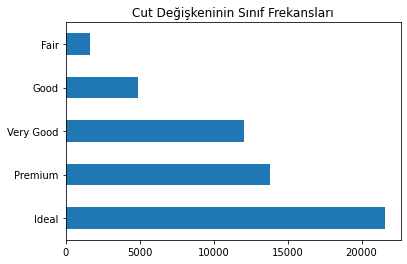

In [22]:
#sondaki ; işareti üstteki bilgi metninin görünmmesini sağlar
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

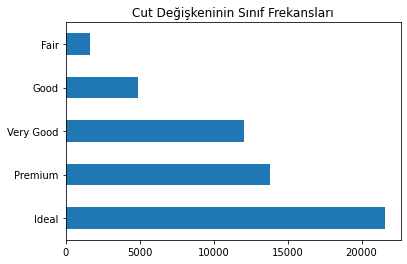

In [23]:
#yazım esnasında kod uzadiginda sorun olmamasi, okumanin kolaylasmasi icin () icine alip alt satırlara inerek kullanabiliriz. 
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

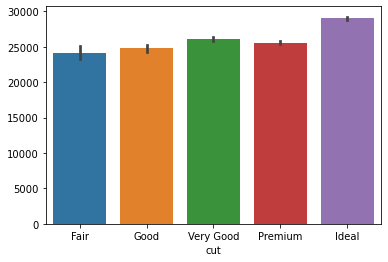

In [24]:
#aynını seaborn kutuphanesi ile daha gorsel olarak gerceklestirebiliriz
sns.barplot(x = "cut", y = df.cut.index, data= df);

#### 6.1.1. Sütun Grafiklerin Çaprazlanması
Veriseti içerisinde bulunan değişkenlerin ve etkilerinin birlikte değerlendirilmesini, kırılımların incelenmesini sağlar
 

In [38]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
color_kategoriler = ["J","I","H","G","F","E","D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))
df.color.head()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


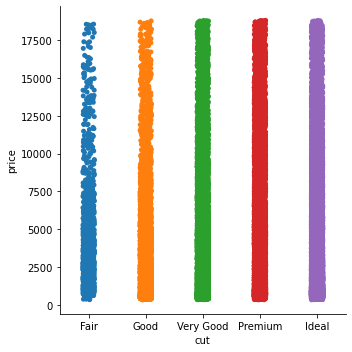

In [39]:
#Taşın kesim şeklinin fiyatına etkisini görmek istiyoruz
sns.catplot(x = "cut", y = "price", data = df);

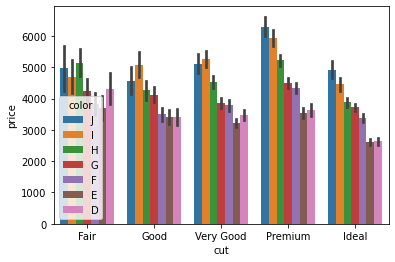

In [40]:
#ustteki grafige, df icindeki color degiskenini de ekleyip daha ayrintili gormeye calisalim
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

<AxesSubplot:xlabel='cut,color'>

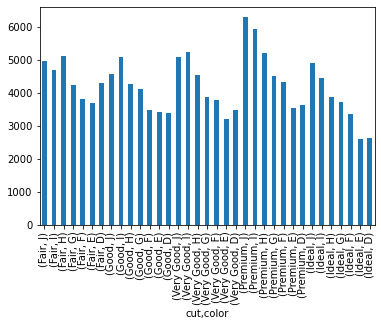

In [41]:
#seaborn kutuphanesinin grafikleri python plota gore daha gelismis
df.groupby(["cut","color"])["price"].mean().plot(kind="bar")

**Not:** iki üstteki grafikte iki kategorik değere birlikte bakıldığından grafiği daha okunabilir hale getirmek için seaborn bir ön işleme yapmaktadır.

Price ekseni iki kategorik değişken (cut ve color) bir arada iken price değişkeninin ortalaması şeklinde gösterilmiştir.

sütunların üzerinde bulunan siyah çubuklar ise standart sapma değerlerini ifade etmektedir.

In [30]:
#üstteki grafiğin doğruluğunu da analiz etmeliyiz
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

### 6.2. Histogram ve Yoğunluk Grafiği
Eldeki sayısal değişkenleri görselleştirmek için kullanılır. Sayısal değişkenlerin dağılımını ifade eder.

In [42]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


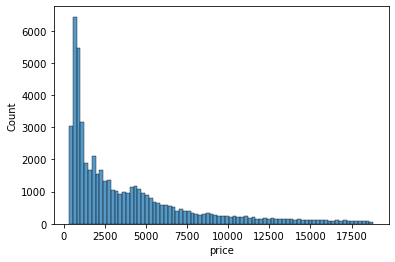

In [49]:
sns.histplot(df.price);

In [50]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [60]:
?sns.histplot

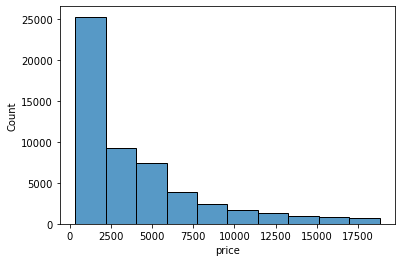

In [54]:
sns.histplot(df.price, bins = 10);

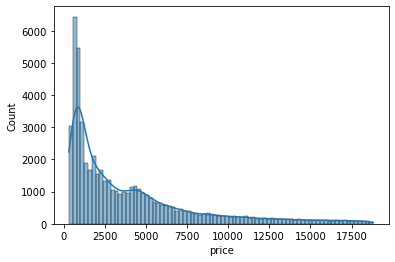

In [57]:
sns.histplot(df.price,kde=True); #kde olasılık yogunluk fonksiyonu

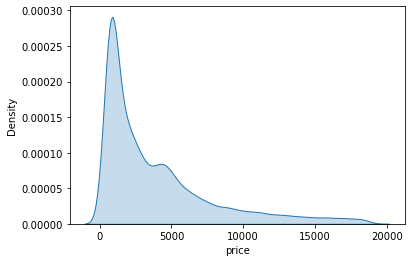

In [61]:
sns.kdeplot(df.price, shade = True);

#### 6.2.1. Histogram Grafiklerinin Çaprazlanması
Veriseti içerisinde bulunan değişkenlerin ve etkilerinin birlikte değerlendirilmesini, kırılımların incelenmesini sağlar
 

In [62]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


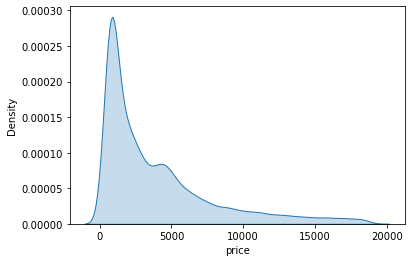

In [63]:
sns.kdeplot(df.price, shade = True);

**Not:** Üstteki grafikte sol tarafta iki tepe gözlemlemekteyiz, bu bize price değişlenini etkileyen farkli etkenler olduğu bilgisini veriyor

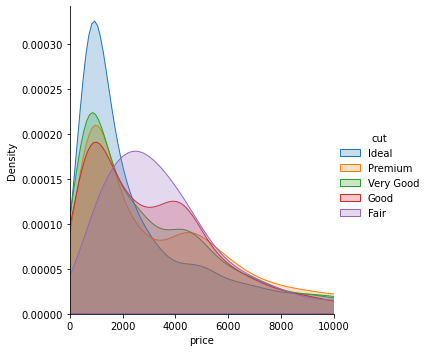

In [67]:
#Grafik üzerinde eklenen boyutları bölerek görüntülemek için kullanılır.
#ustte belirttigimiz grafigi map'leyerek facegrid'e uyguladik 
#boylece her bir cut degeri icin ayni yogunluk fonksiyonunu gözlemlemis olacagiz
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "price", shade= True)
 .add_legend()
);

**Not:** üstteki grafige baktigimizda, cut degiskenin (ideal olma durumu en iyiyi ifade ediyordu) ideal olma durumunun dusuk fiyatli urunlerde daha fazla gozlemlendigini anlamaktayız...

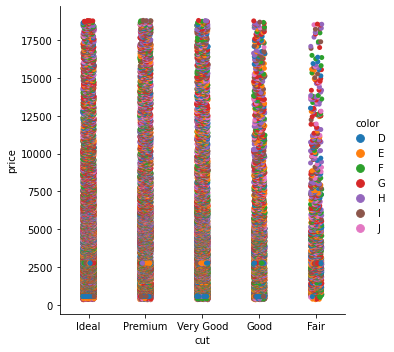

In [69]:
sns.catplot(x = "cut", y = "price", hue = "color", data = df);

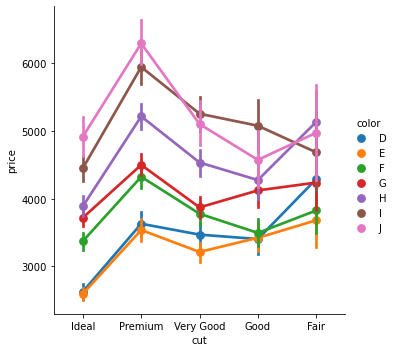

In [68]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

In [73]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
color_kategoriler = ["J","I","H","G","F","E","D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))
clarity_kategoriler = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
df.clarity = df.clarity.astype(CategoricalDtype(categories = clarity_kategoriler, ordered = True))
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

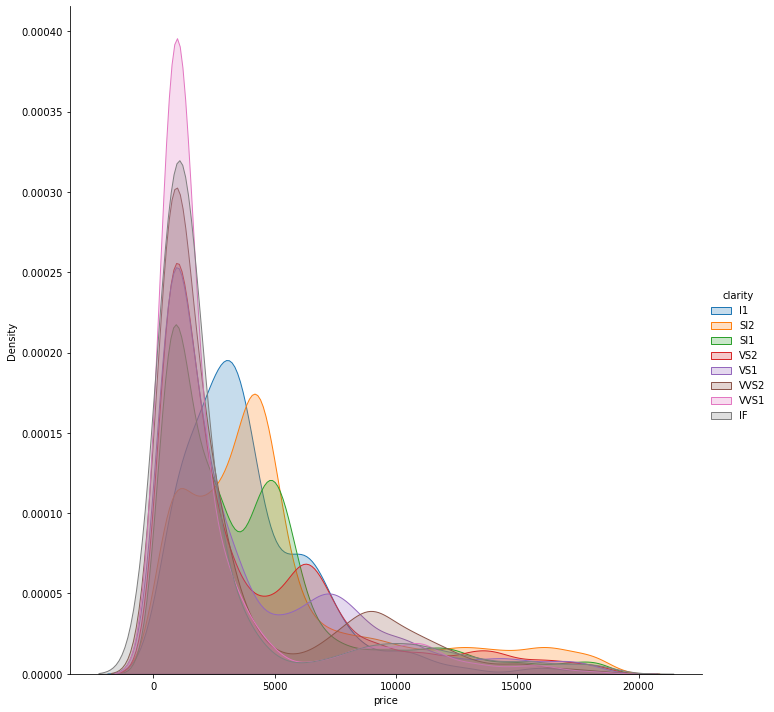

In [78]:
(sns
 .FacetGrid(df,
              hue = "clarity",
              height = 10)
 .map(sns.kdeplot, "price", shade= True)
 .add_legend()
);

### 6.3. Boxplot (Kutu Grafiği)
Sayısal değişkenleri görselleştirmek için kullanılır.

#### Veri Setinin Hikayesi

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [81]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [83]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [84]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [85]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [86]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

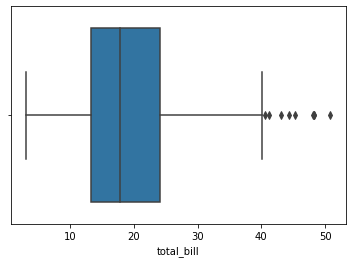

In [87]:
#quartiller araciligiyla bilgiler sunar
sns.boxplot(x = df["total_bill"]);

1. minimum değer
2. %25
3. %50 (median)
4. %75
5. maksimum

maksimum değere doğru giden noktalar aykırı değerleri ifade eder.



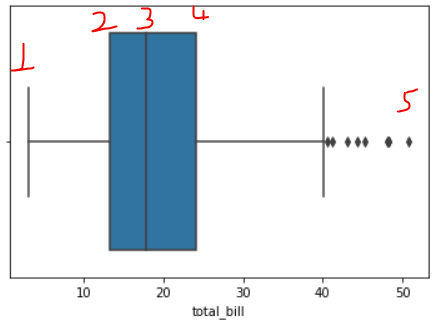

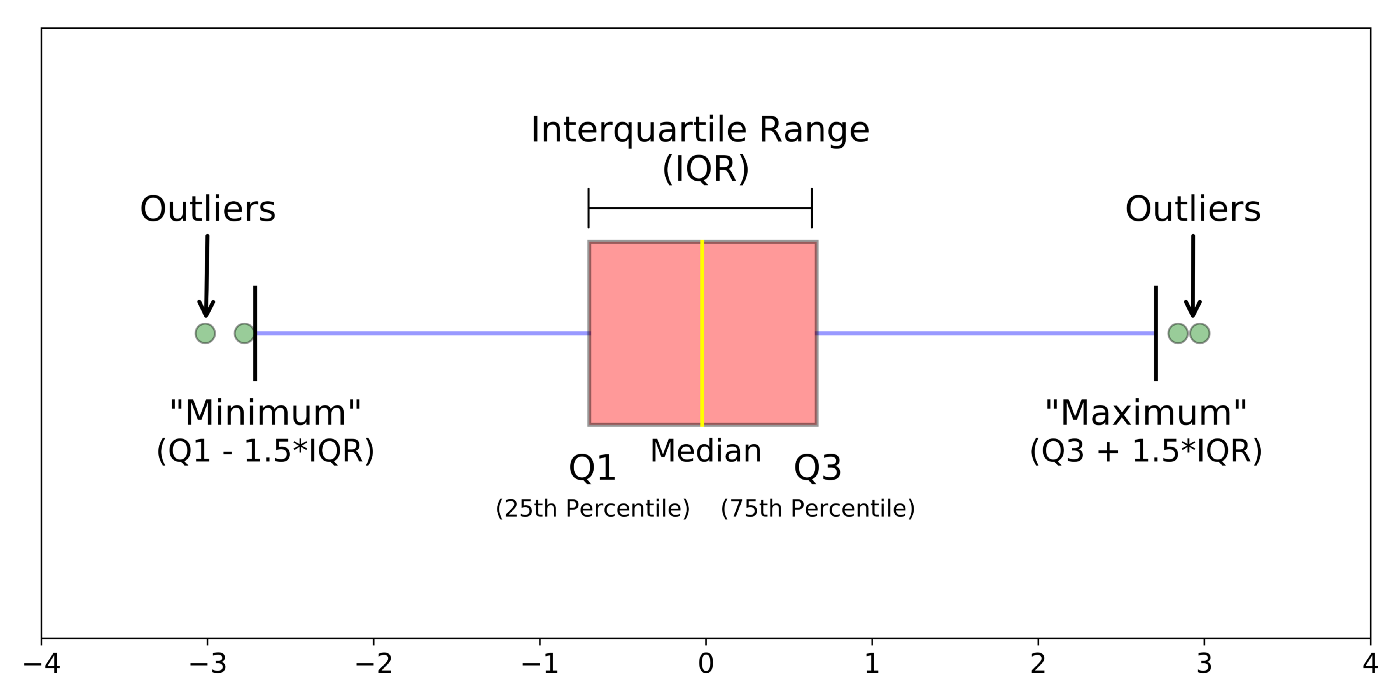

#### 6.3.1. Boxplot (Kutu Grafiği) Çaprazlama

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


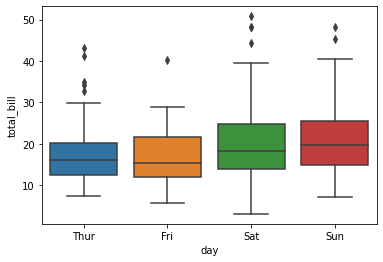

In [96]:
#Hangi gunler daha fazla kazanç sağlanmış?
sns.boxplot(x = "day", y = "total_bill", data = df);
#pazar günü gelen müşteriler (cumartesiye göre sayıları daha az) daha fazla para bırakıyor.

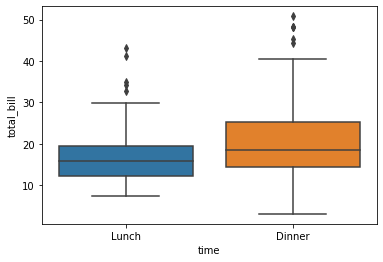

In [94]:
#sabah mı akşam mı daha çok kazanılıyor?
sns.boxplot(x = "time", y = "total_bill", data = df);

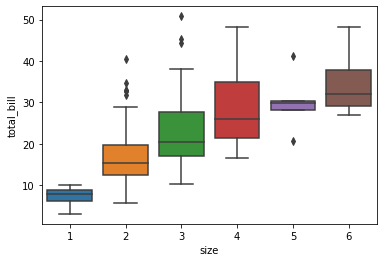

In [92]:
#kisi sayısının kazanca etkisi nedir?
sns.boxplot(x = "size", y = "total_bill", data = df);

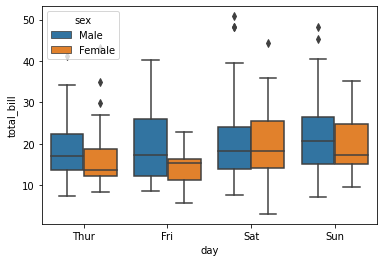

In [97]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

### 6.4. Violinplot (Violin Grafiği)
Boxplota benzer, ek olarak yoğunluk anlamında bilgi sunar. 


In [98]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


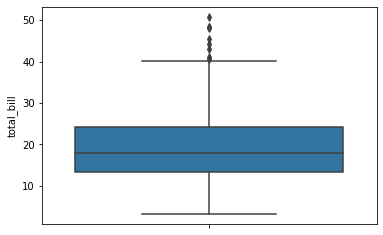

In [100]:
sns.boxplot(y = "total_bill",  data = df);

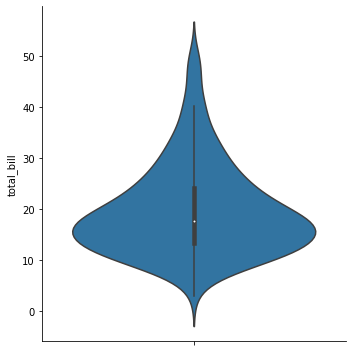

In [99]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

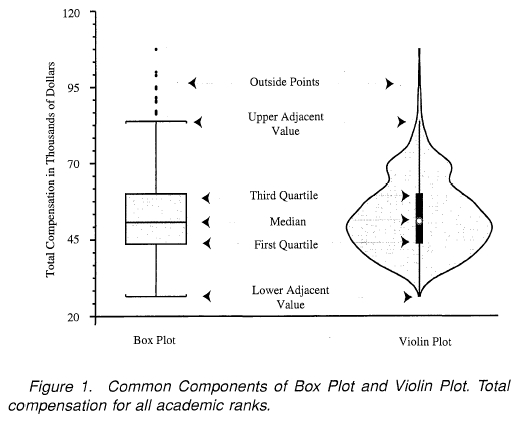

#### 6.4.1. Violinplot (Violin Grafiği) Çaprazlama

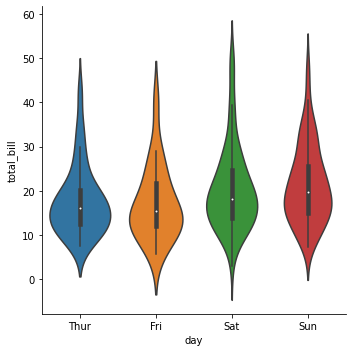

In [101]:
sns.catplot(x= "day", y = "total_bill", kind = "violin", data = df);

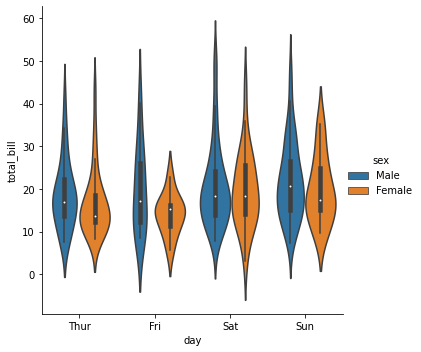

In [102]:
sns.catplot(x= "day", y = "total_bill", hue = "sex",kind = "violin", data = df);

## 7. Korelasyon Grafikleri
Değişkenler arasındaki ilişkiyi ifade eden istatistiksel bir terim.

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

### 7.1. Scatter Plot
Saçılım Grafiği, sayısal değişkenler arasındaki ilişkiyei gösterir

In [103]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


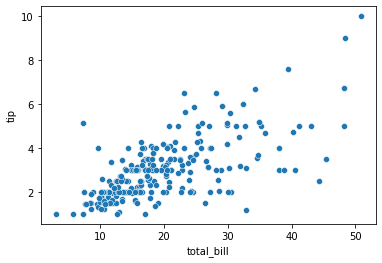

In [105]:
#toplam hesap ve ödenen bahşiş arasındaki ilişki
sns.scatterplot(x = "total_bill", y = "tip", data = df);

#### 7.1.1. Scatter Plot Çaprazlama

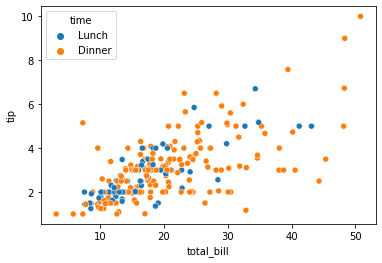

In [106]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time",data = df);

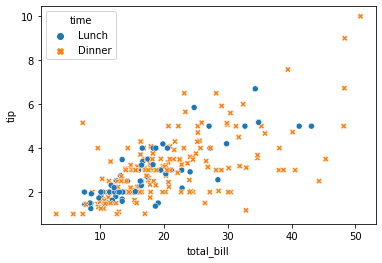

In [107]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

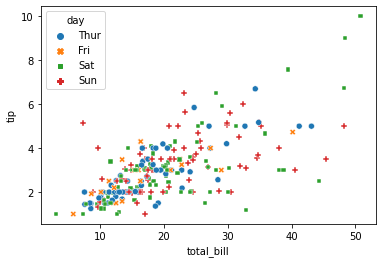

In [108]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "day", data = df);

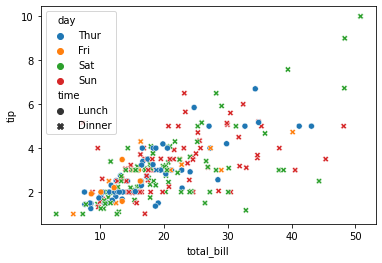

In [110]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df);

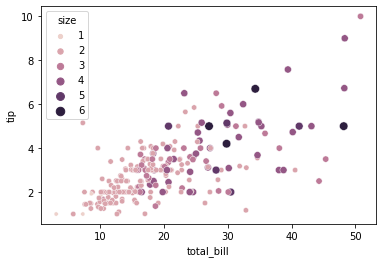

In [109]:
sns.scatterplot(x = "total_bill", y = "tip", hue= "size", size = "size", data = df);

#### 7.1.2. Doğrusal İlişkinin Gösterilmesi


In [3]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


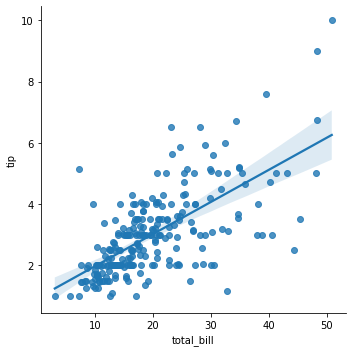

In [4]:
sns.lmplot(x = "total_bill", y = "tip", data = df);

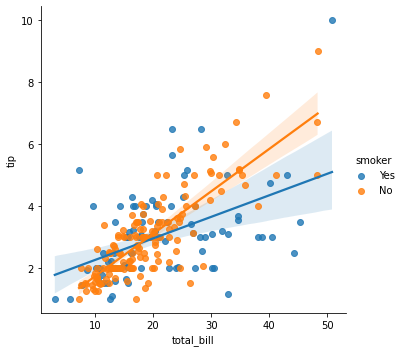

In [5]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

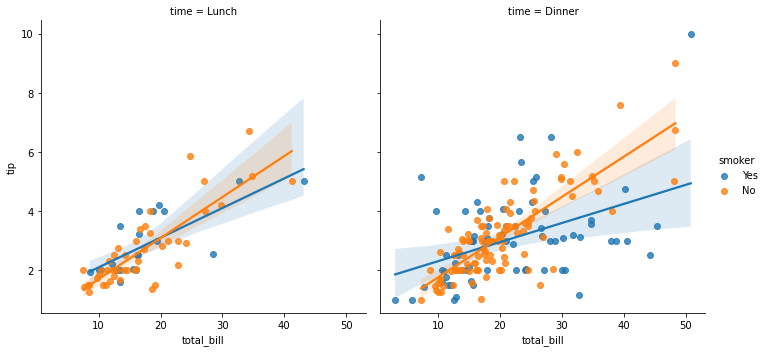

In [6]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

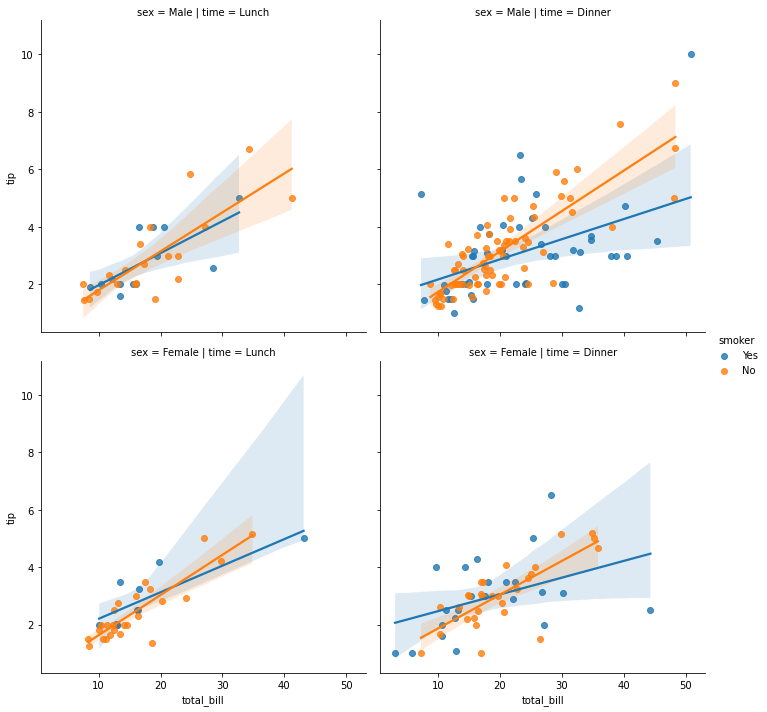

In [7]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);

#### 7.1.3. Scatterplot Matrisi
Sayısal değişkenler arasındaki ilişkiyi matris haline gösterme şeklidir. 

##### Veri Seti Hikayesi
Attribute Information:

   -> sepal length in cm
   
   -> sepal width in cm
   
   -> petal length in cm
   
   -> petal width in cm
   
   -> class: 
   
              Iris Setosa
              Iris Versicolour
              Iris Virginica

Number of Instances: 150 

In [9]:
import seaborn as sns; 
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

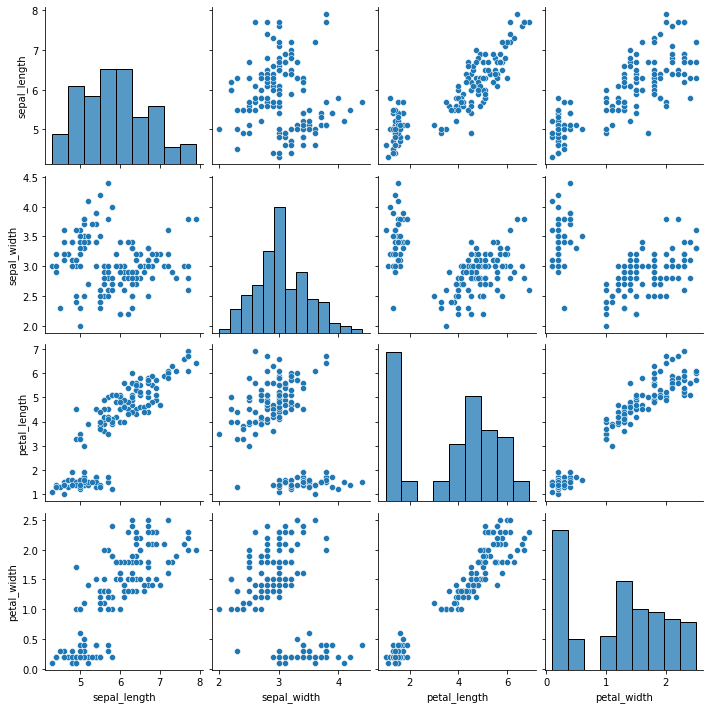

In [11]:
#solda satır isimleri altta sutun isimlerinin çaprazlanma sonuçları
sns.pairplot(df);

**Not:** üstteki örnekte petal_length ve petal_width hücresine baktigimizda ikisi arasında doğrudan bir ilişki olduğunu gözlemleyebiliriz.

Gene grafikler incelendiğinde, farklı noktalarda kümelenmeler varsa çaprazlamadan kaynaklı alt kümelerin oluştuğu söylenebilir

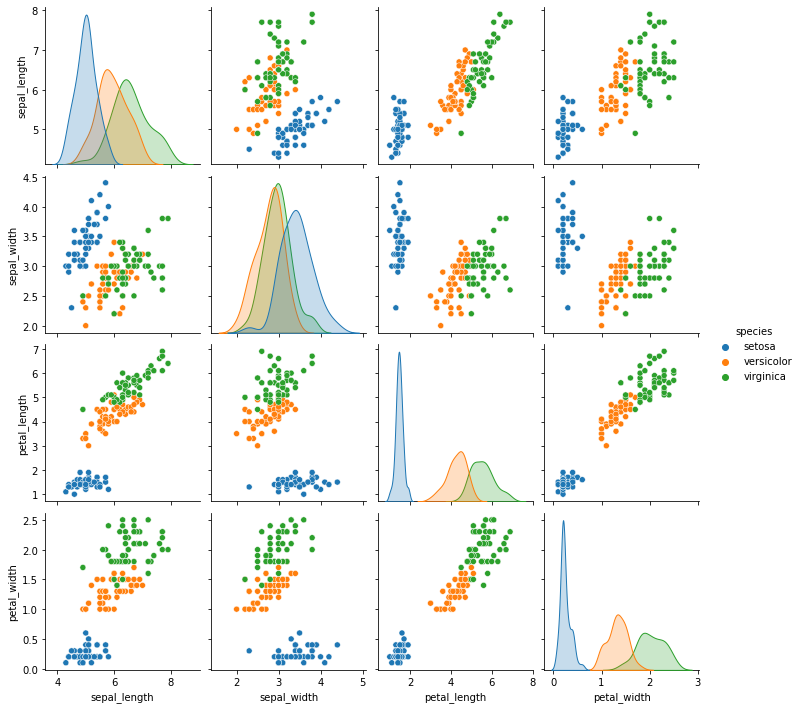

In [13]:
#tür bilgisini de grafiğe ekleyelim
sns.pairplot(df, hue = "species");

**Not:** bu şekilde ayrık kümelenmelerin sebeplerini de görmüş oluyoruz.

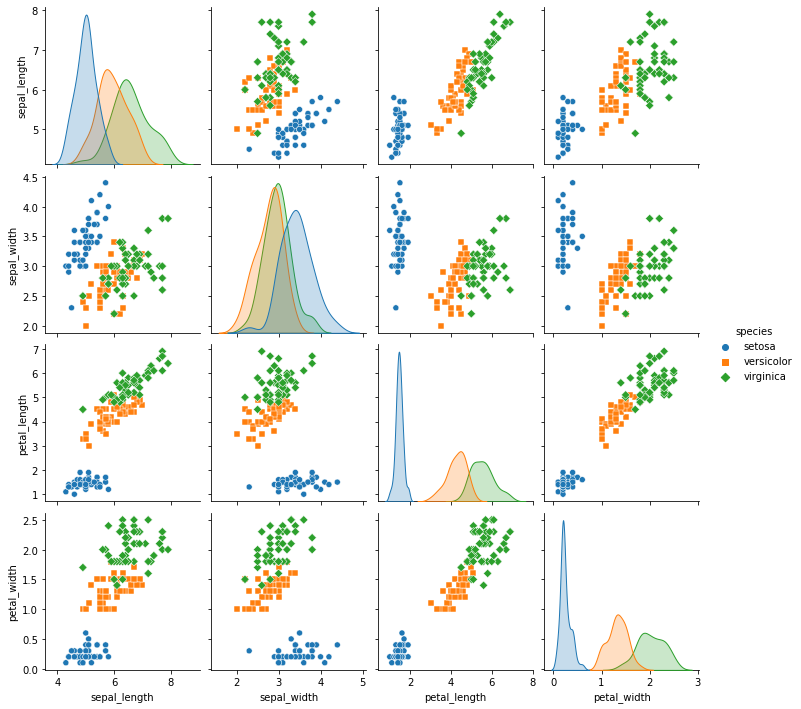

In [14]:
sns.pairplot(df, hue = "species", markers = ["o","s","D"]);

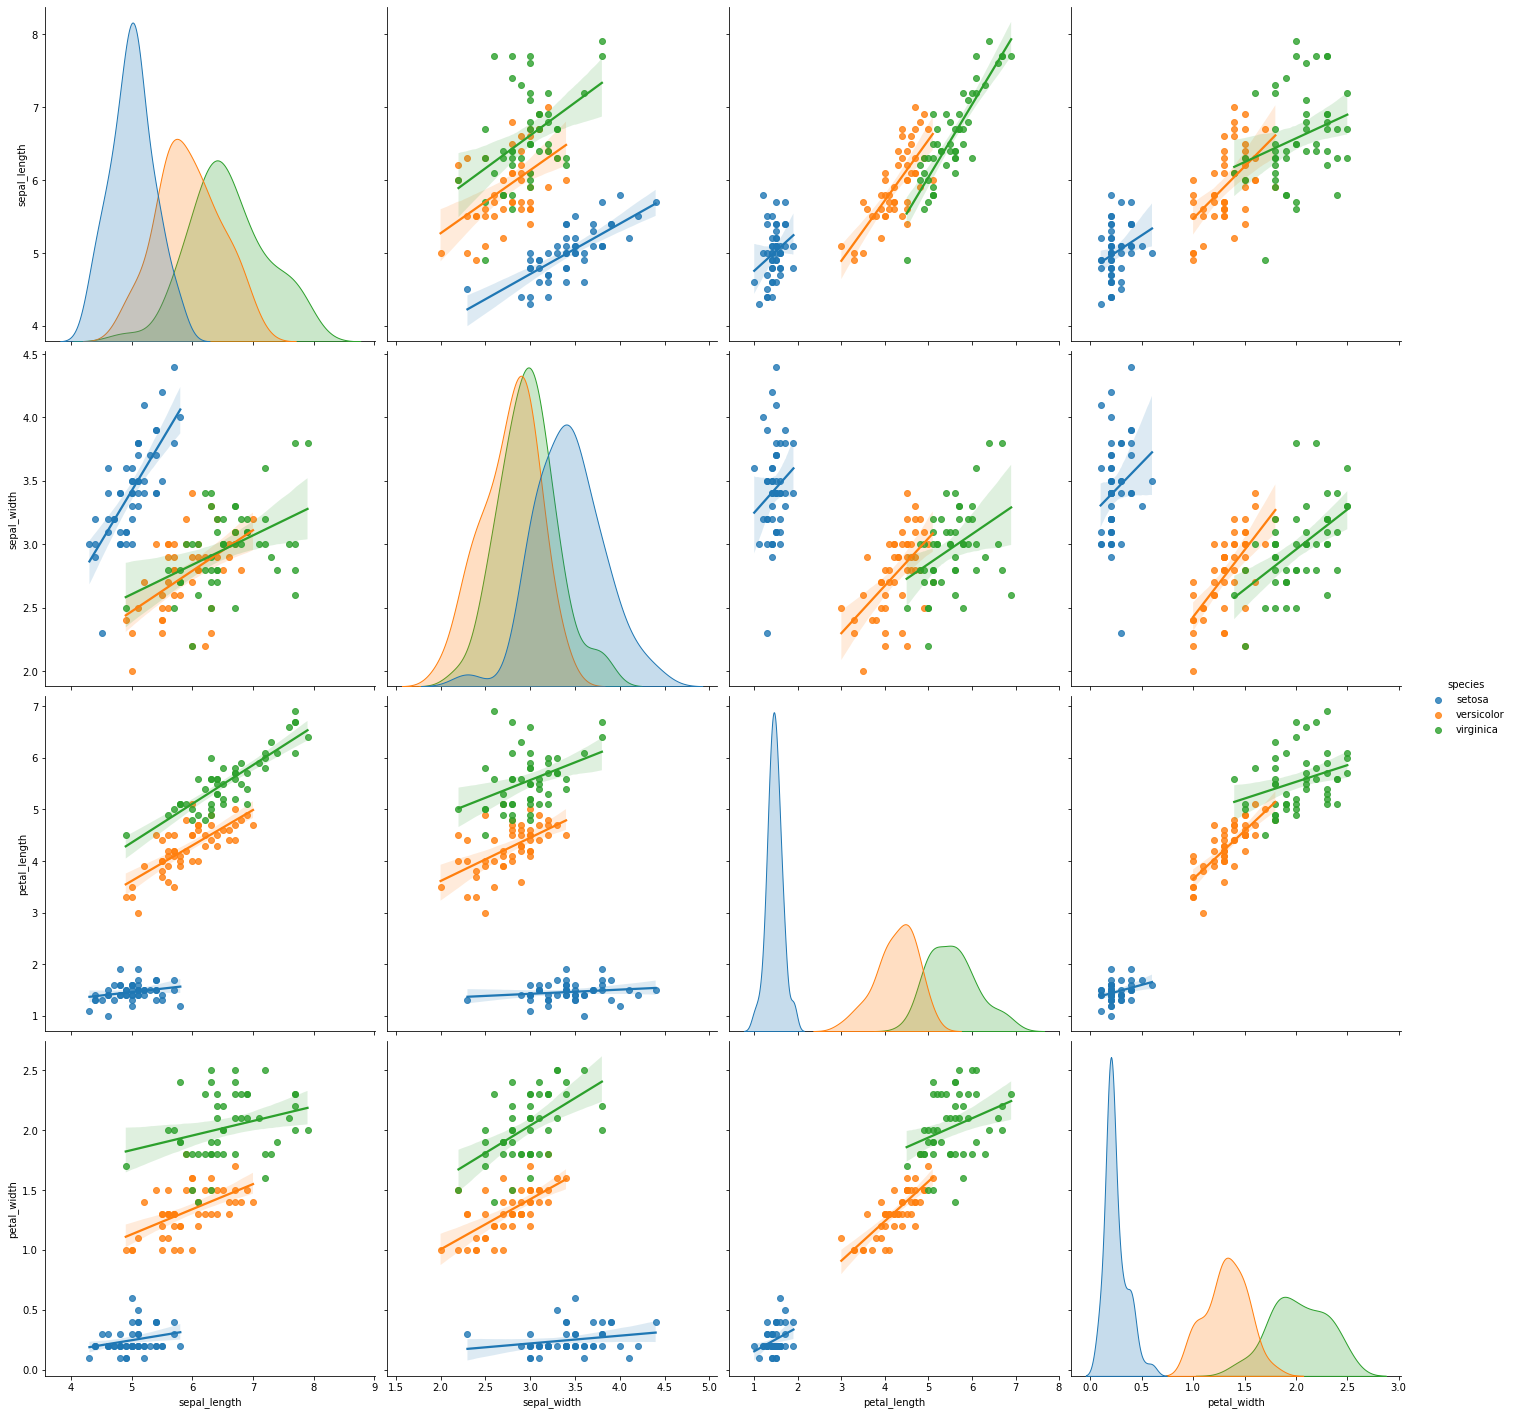

In [17]:
sns.pairplot(df, kind = "reg", hue = "species",height=5);

### 7.3. Heat Map (Isı Haritası)
Isı Haritaları değişkenleri satırlara ve sütunlara yerleştirerek ve tablodaki hücreleri renklendirerek çok değişkenli verileri çapraz incelemek için yararlıdır. Isı haritaları, birden çok değişken arasında varyans göstermek, herhangi bir tasarım ortaya çıkarmak, herhangi bir değişkenin birbirine benzer olup olmadığını göstermek ve aralarında herhangi bir korelasyon olup olmadığını tespit etmek için kullanılabilir.

#### Veriseti Hikayesi
 “flights” dataset, which records the number of airline passengers who flew in each month from 1949 to 1960. This dataset has three variables (year, month, and number of passengers):

In [23]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [25]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [26]:
df = df.pivot("month", "year", "passengers");
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


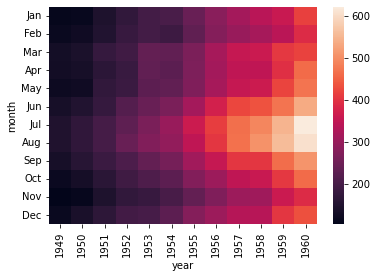

In [27]:
sns.heatmap(df);

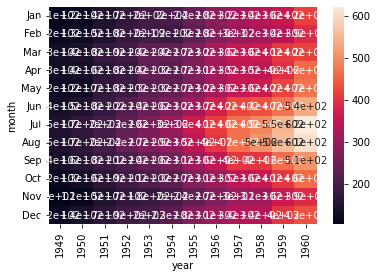

In [28]:
sns.heatmap(df, annot = True);

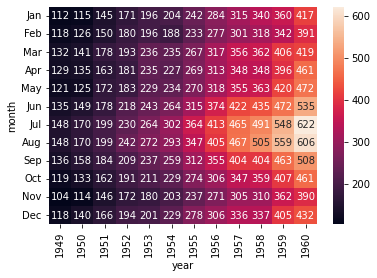

In [29]:
sns.heatmap(df, annot = True, fmt = "d");

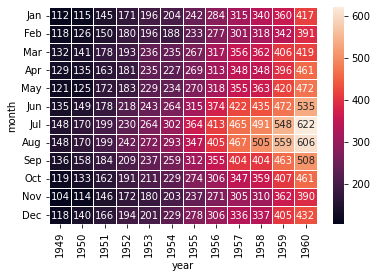

In [30]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

### 7.4. Çizgi Grafiği


#### Veriseti Hikayesi
Fonksiyonel MR (işlevsel manyetik rezonans görüntüleme; fMRI ya da iMRG), çalışmakta olan beyindeki fonksiyonel süreçleri BOLD (Blood oxygenation level dependent, kan oksijenlenme seviyesine bağımlı) sinyali temel alarak ölçer.

subject: verinin toplandığı kişi
timepoint: zaman 
event: sinyal alınırken gerçekleştirilen olay
region: sinyalin bölgesi
signal: sinyal

In [33]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [34]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [35]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [36]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


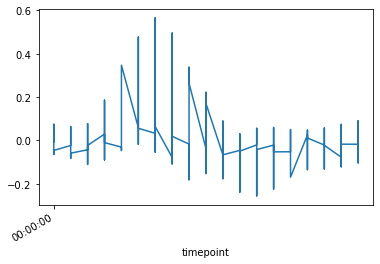

In [49]:
import pandas as pd
sinyal=df["signal"]
sinyal.index = pd.DatetimeIndex(df["timepoint"])
sinyal.plot();

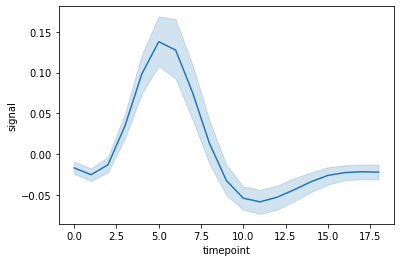

In [42]:
#koyu mavi ortalama değerler, açık mavi ise standart sapmayı ifade ediyor
sns.lineplot(x = "timepoint", y = "signal", data = df);

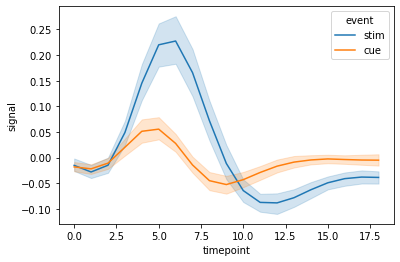

In [38]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

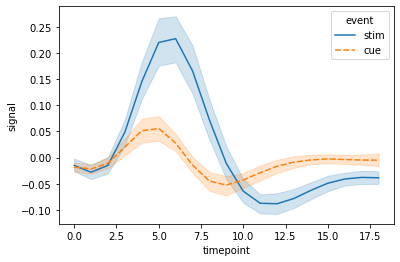

In [39]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

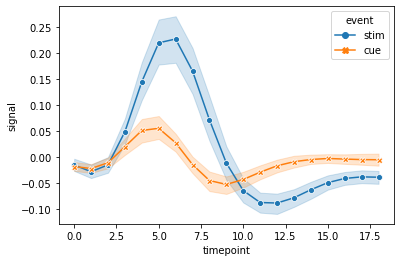

In [40]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event", 
             markers = True,  dashes = False, data = df);

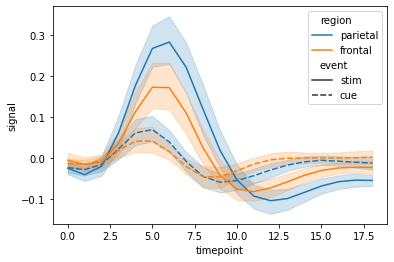

In [41]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event", 
             data = df);

### 7.5. Basit zaman serisi grafiği

In [1]:
!pip install pandas_datareader
import pandas_datareader as pr

In [2]:
# Apple firmasının borsa değerleri
df = pr.get_data_yahoo("AAPL", start = "2020-01-01", end = "2022-04-05")

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.894318
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.175919
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.759010
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.412109
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.593033


In [4]:
df.shape

(569, 6)

In [5]:
kapanis = df["Close"]
kapanis.head()

Date
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
Name: Close, dtype: float64

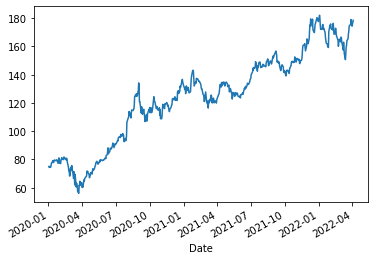

In [6]:
kapanis.plot();

In [7]:
#indexi doğru şekilde almazsa
kapanis.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-04'],
              dtype='datetime64[ns]', name='Date', length=569, freq=None)

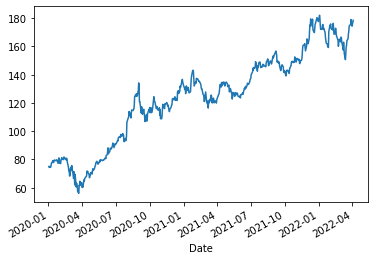

In [10]:
import pandas as pd
kapanis.index = pd.DatetimeIndex(kapanis.index)
kapanis.plot();